In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import cv2
from sever.data_loader import RLE

In [2]:
train_csv = '../data/raw/severstal-steel-defect-detection/train.csv'
df = pd.read_csv(train_csv)
df['ImageId'], df['ClassId'] = zip(*df['ImageId_ClassId'].str.split('_'))
df['ClassId'] = df['ClassId'].astype(int)
df = df.pivot(index='ImageId', columns='ClassId', values='EncodedPixels')
df.columns = [f'rle{c}' for c in range(4)]
df['defects'] = df.count(axis=1)
df.head()

,rle0,rle1,rle2,rle3,defects
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
00031f466.jpg,NaN,NaN,NaN,NaN,0
000418bfc.jpg,NaN,NaN,NaN,NaN,0
000789191.jpg,NaN,NaN,NaN,NaN,0
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1


In [3]:
img_dir = Path('../data/raw/severstal-steel-defect-detection/train_images')
img_filenames = list(img_dir.glob('*.jpg'))
len(img_filenames)

12568

In [10]:
imgs = [cv2.imread(str(f))[:, :, 0:1] for f in img_filenames[10:13]]
rles = [df.loc[f.name, ['rle0', 'rle1', 'rle2', 'rle3']] for f in img_filenames[10:13]]
masks = [np.stack([RLE.from_str(s).to_mask() for s in row], axis=2) for row in rles]

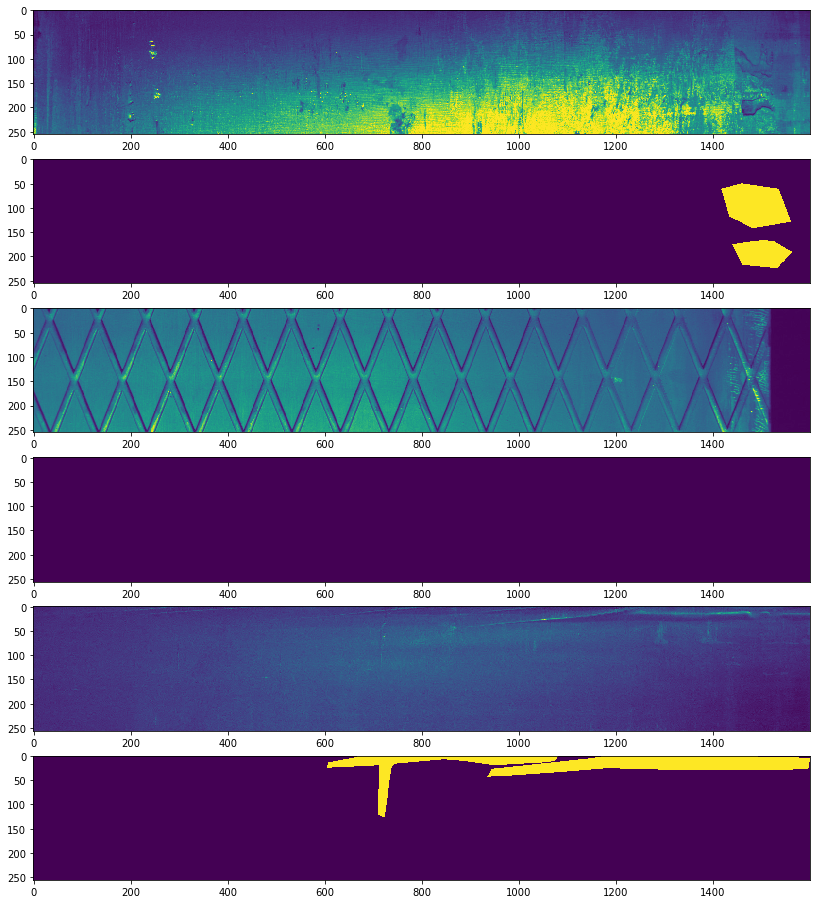

In [12]:
def plot_imgs(imgs, masks):
    fig, axs = plt.subplots(6, 1, figsize=(16, 16))
    for i in range(3):
        axs[i*2].imshow(imgs[i][:, :, 0])
        axs[i*2+1].imshow(masks[i].sum(axis=2))
    plt.show()
plot_imgs(imgs, masks)

In [15]:
tsfm = A.Compose([
#     A.OneOf([
        # A.CropNonEmptyMaskIfExists(256, 416),
        A.RandomCrop(256, 416)
#     ], p=1),
    # A.CLAHE(p=1),
    # A.IAASharpen(alpha=(0.2, 0.4), p=1),
    #A.RandomContrast(),
    #A.RandomContrast(),
])

In [16]:
tsfm_out = [tsfm(image=imgs[i], mask=masks[i]) for i in range(3)]
tsfm_imgs = [tsfm['image'] for tsfm in tsfm_out]
tsfm_mask = [tsfm['mask'] for tsfm in tsfm_out]
for img in tsfm_imgs:
    print(img.shape)
#plot_imgs(tsfm_imgs, tsfm_mask)

(256, 416, 1)
(256, 416, 1)
(256, 416, 1)
